<a href="https://colab.research.google.com/github/MAvRK7/Neural-Nets-Learning/blob/main/Makemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Make More mark 1

we are going to be generating names, after building a model that will train on the dataset

a character level generator (char level lang model)

so it can predict the next char only

In [ ]:
#make all the names a python list
words=open("/content/names.txt","r").read().splitlines()

In [ ]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [ ]:
min(len(w)for w in words)

2

In [ ]:
max(len(w)for w in words)

15

under the hood

char level means, for eg in Isabella, we can see that
* I is likely to start
* s is likely to come after I
* a is likely to come after Is
* and so on, and after Isabella, the word is likely to end

Now lets use a bigram language model

TWO characters at a time: a char thats given, we try and predict the next

so here, we dont consider the three and all, just two

however we do take into account the starting and ending letter

In [ ]:
b={}
for w in words[:3]:
  chs=["<S>"]+ list(w) + ["<E>"]
  for ch1,ch2 in zip(chs,chs[1:]):
    bigram=(ch1,ch2)
    b[bigram]=b.get(bigram,0)+1
    print(ch1,ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [ ]:
b

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

so a was the ending char 3 times

doing it for the entire data set

In [ ]:
b={}
for w in words:
  chs=["<S>"]+ list(w) + ["<E>"]
  for ch1,ch2 in zip(chs,chs[1:]):
    bigram=(ch1,ch2)
    b[bigram]=b.get(bigram,0)+1

In [ ]:
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


getting the most common

use dict_name.items() when you want to iterate over a dict and want to use both keys and values

sorted() sorts in ascending order, so we make it -ve to sort in descending, and kv[1] because we want to sort by count

In [ ]:
sorted(b.items(),key=lambda kv:-kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

we will store this using a 2D array using torch instead of a dict

In [ ]:
import torch

In [ ]:
a=torch.zeros((2,2),dtype=torch.int32)
a

tensor([[0, 0],
        [0, 0]], dtype=torch.int32)

changing the entries

In [ ]:
a[1,1]+=1
a

tensor([[0, 0],
        [0, 1]], dtype=torch.int32)

now we are interested in a much larger array

we have 26 alphabets + two special chars < s > and < e > so we want a 28*28 array

In [ ]:
N=torch.zeros(28,28,dtype=torch.int32)

all the chars: a,b,c...z

In [ ]:
chars=sorted(list(set("".join(words))))

now, we need to make a lookup table to fill these 0 array and we have a set to remove duplicates

In [ ]:
stoi={s:i for i,s in enumerate(chars)}
#we have to be specific about <s> and <e>
stoi["<S>"]=26
stoi["<E>"]=27

In [ ]:
itos={i:s for s,i in stoi.items()}

creating the 2D matrix, for example when ab comes, row a and col b get 1

row means starting letter, col means ending letter

In [ ]:
for w in words:
  chs=["<S>"]+ list(w) + ["<E>"]
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    N[ix1,ix2]+=1

how this came?

for emma, it becomes < S>, e, m, m, a, < E>

("< S>", "e"):

ix1 = stoi["< S>"] = 26

ix2 = stoi["e"] = 4

N[26, 4] += 1

like so for every name

In [ ]:
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

making it better

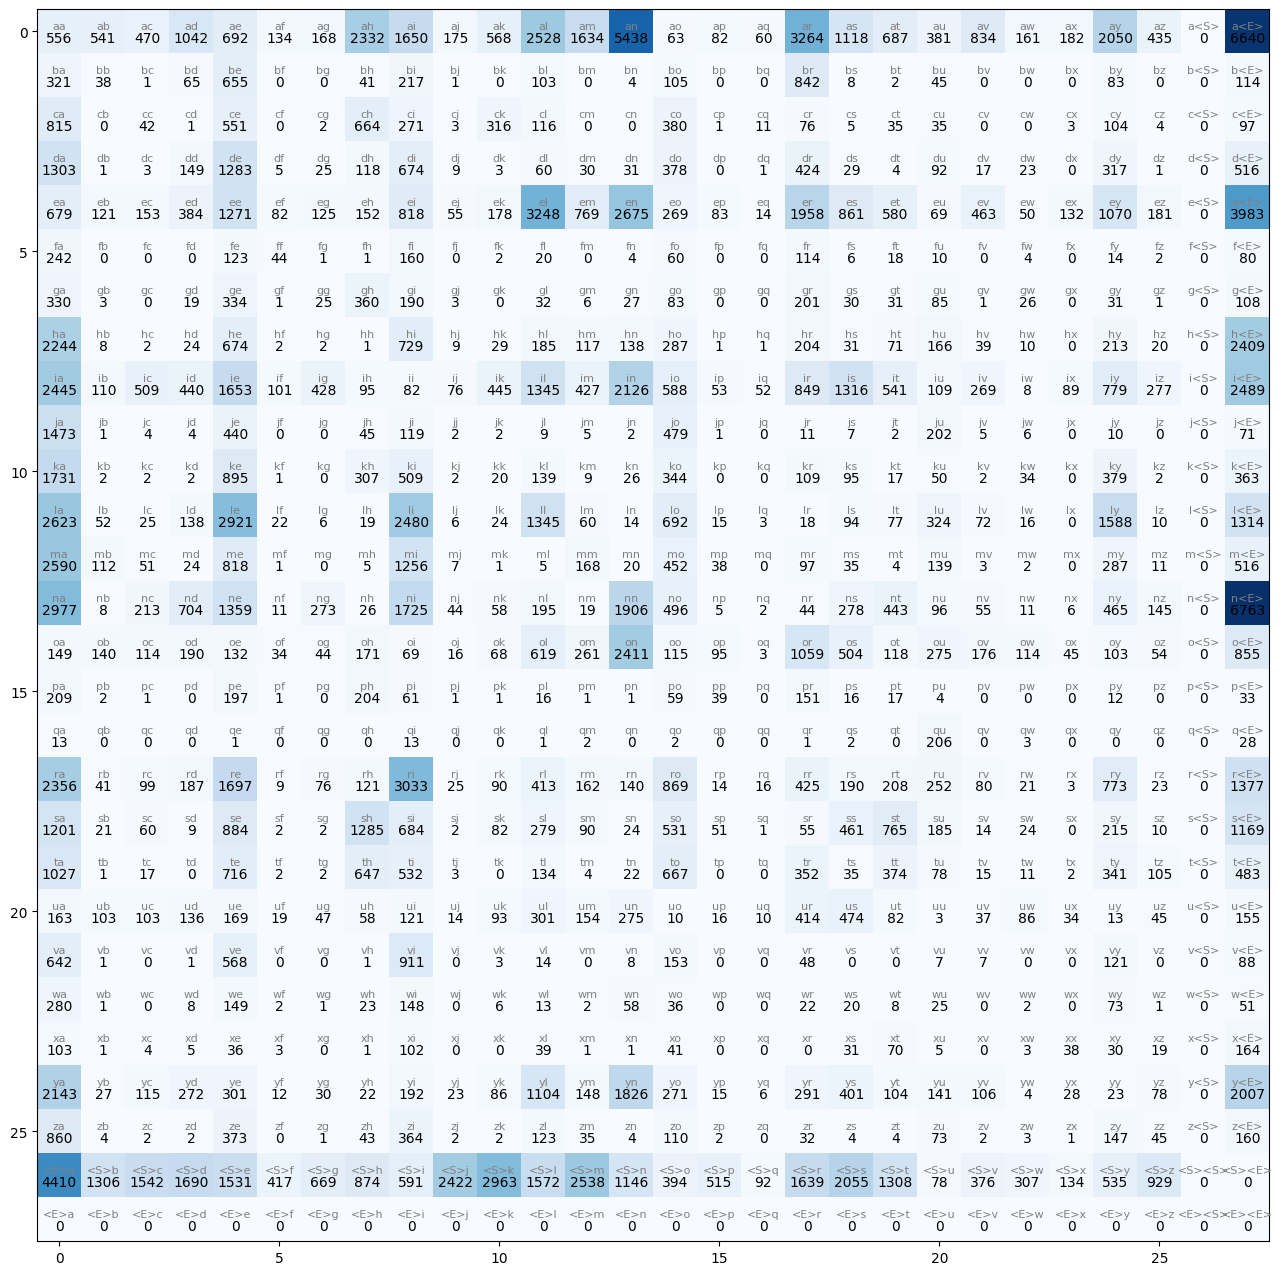

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")

for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]#not addition, like a,a

        # Add text for 'chstr' at each (i, j) position
        plt.text(j, i, chstr, ha="center", va="bottom", color="grey", fontsize=8)

        # Add text for numeric value at each (i, j) position
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="black", fontsize=10)

# Hide axes
plt.axis=("off");

making it better

remove special < s> and < i> and have just one special char "."

keep it at the start (0) and offset everything else by 1 ie start a with 1,b is 2...

order is .,a,b,c...z

In [ ]:
N=torch.zeros(27,27,dtype=torch.int32)

In [ ]:
stoi={s:i+1 for i,s in enumerate(chars)}
stoi["."]=0
itos={i:s for s,i in stoi.items()}

In [ ]:
for w in words:
  chs=["."]+ list(w) + ["."]
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    N[ix1,ix2]+=1

upto 27

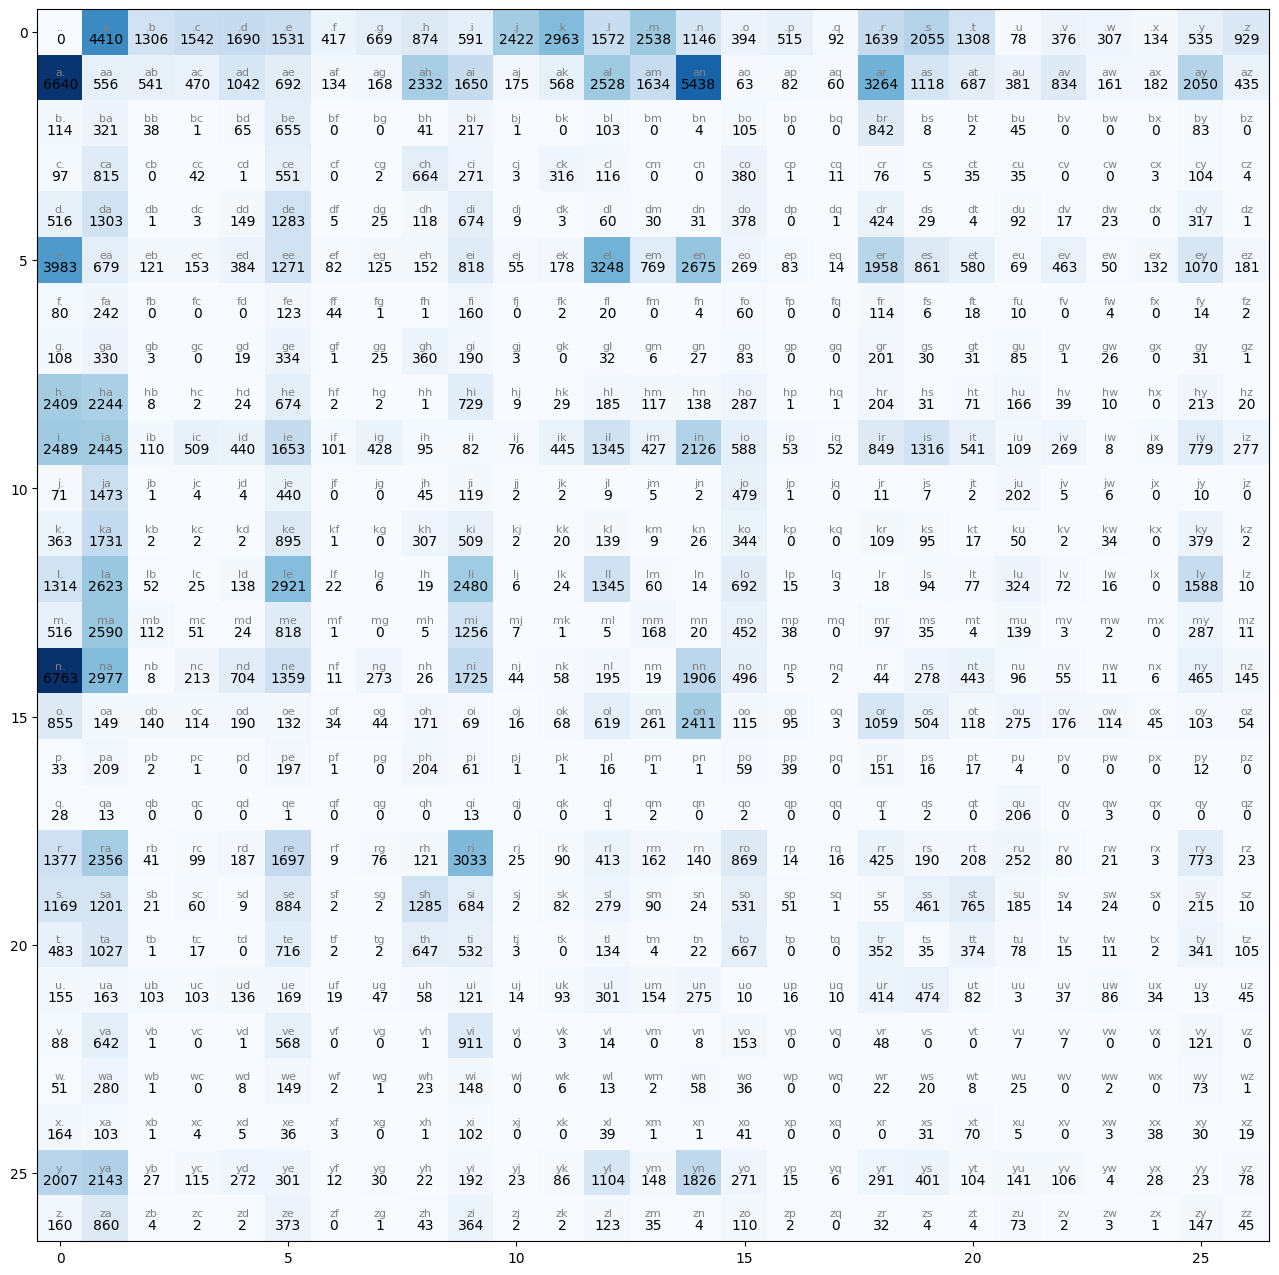

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]#not addition, like a,a

        # Add text for 'chstr' at each (i, j) position
        plt.text(j, i, chstr, ha="center", va="bottom", color="grey", fontsize=8)

        # Add text for numeric value at each (i, j) position
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="black", fontsize=10)

# Hide axes
plt.axis=("off");

-> rows are starting eg a starts 4410 words

| cols means ending, eg 6649 words end with a

first row of N

In [ ]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

get probabilities

In [ ]:
p=N[0].float()
p=p/ p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

now we will sample from this ditribution

we will use torch.multinomial

"you give me probabilities, and i will give you integers which are sampled acc. the probability distribution"

it actually gives it out, instead of just giving prob like softmax

we will also use a torch.generator to make everything deterministic (seed)

so we use the torch.Generator() object to generate

In [ ]:
g=torch.Generator().manual_seed(2147483647)
pr=torch.rand(3,generator=g) #give me 3 random numbers
pr=pr/pr.sum()
pr

tensor([0.6064, 0.3033, 0.0903])

so this generator generates 3 numbers, the probablity of the first number (0) coming is 60%, second (1) is 30% and the last (2) is 10%

then we use torch.multinomial to draw samples from it

In [ ]:
torch.multinomial(pr, num_samples=20, replacement=True,generator=g)
#here p is the 60%,30%,10% one not the one from our N

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

lets use our P

In [ ]:
p=N[0].float()
p=p/ p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
g=torch.Generator().manual_seed(2147483647)
ix=torch.multinomial(p, num_samples=1, replacement=True,generator=g).item()
itos[ix]

'c'

so we got c as the output, so we look at the c row and do the same thing, until it stops

automating this

In [ ]:
g=torch.Generator().manual_seed(2147483647)

ix=0
while True:
  p=N[ix].float()
  p=p/p.sum()
  ix=torch.multinomial(p, num_samples=1, replacement=True,generator=g).item()
  print(itos[ix])
  if ix==0:
    break


c
e
x
z
e
.


In [ ]:
g=torch.Generator().manual_seed(2147483647)
for i in range(10):

  out=[]
  ix=0
  while True:
    p=N[ix].float()
    p=p/p.sum()
    ix=torch.multinomial(p, num_samples=1, replacement=True,generator=g).item()
    out.append(itos[ix])

    if ix==0:
      break

  print("".join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


Now, we are doing p/p.sum (ie) we're normalising it in every iteration, that is very inefficient

so lets make a matrix P, that has probabilities in it

it will be normalised and will have the probability of the next char, given the char before it

In [ ]:
P=N.float()

now we need to divide  by the sum of rows, but P.sum is the sum of everything in the matrix N

we want to simultaniously divide all rows by their resp. sum

In [ ]:
P.sum()

tensor(228146.)

In [ ]:
P.sum(0)

tensor([32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
        17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
        12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.])

the shape is

In [ ]:
P.sum(0).shape

torch.Size([27])

now with keepdim=True, we dont pop out the 1, ie, squeeze

In [ ]:
P.sum(0,keepdim=True).shape

torch.Size([1, 27])

In [ ]:
P.sum(0,keepdim=True)

tensor([[32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
         17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
         12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.]])

This is the sums of all the rows (0 means vertical), we want horizontal, so we use 1

In [ ]:
P.sum(1,keepdim=True)

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [ ]:
P.sum(1,keepdim=True).shape

#it will be [1,27] without keepdim

torch.Size([27, 1])

#Broadcasting

see fundamentally, when we add (+,-,*,/) a matrix with another, they must be of the same size. But when we add a scalar to a matrix

1,1 + 1 = 2, 2

1,1..........2, 2

so 1 got broadcasted into all the elements of the matrix, so when we add a m * n matrix with a 1 * n, the 1 becomes m, like how in the eg, 1 which is a 1 * 1 got broadcasted into 2 * 2 here

so either it should be non existant, 1 or same size


in the main

N is 27* 27

sum is 27 * 1

Checking if Broadcastable

so go from <- RIGHT to LEFT - , check if either
1. They are equal (1 is not 27) but (27 is 27,check)
2. One of them is 1 (1 is 1, check)
3. One of them does not exist

so as we have 2 nums, and 2 checks, it is possible, this operation is broadcastable, so we can do arithemtic with P and sum

so what happens is 1 is stretched to become 27, copies are made



In [ ]:
P =N.float()
P=P/P.sum(1,keepdim=True)#element wise division is made

to check if it works, yes it does sum up to 1

In [ ]:
P[0].sum()

tensor(1.)

checking on our bigram model

In [ ]:
g=torch.Generator().manual_seed(2147483647)
for i in range(10):

  out=[]
  ix=0
  while True:
    p=P[ix].float()
    #p=p/p.sum()
    ix=torch.multinomial(p, num_samples=1, replacement=True,generator=g).item()
    out.append(itos[ix])

    if ix==0:
      break

  print("".join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


we got the same exact output

In [ ]:
p

tensor([0.1960, 0.0164, 0.0160, 0.0139, 0.0308, 0.0204, 0.0040, 0.0050, 0.0688,
        0.0487, 0.0052, 0.0168, 0.0746, 0.0482, 0.1605, 0.0019, 0.0024, 0.0018,
        0.0963, 0.0330, 0.0203, 0.0112, 0.0246, 0.0048, 0.0054, 0.0605, 0.0128])

BUG

if we do not put keepdim as true, then we will have just 27

27,27

....27

here first - is same (27 and 27), second is nothing and 27, so ok,

internally

27,27

1, 27

so yes, this is possible but it will give us the wrong answers


EVALUATING the bigram model

In [ ]:
for w in words[:3]:
  chars=["."]+list(w)+["."]
  for ch1,ch2 in zip(chars,chars[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    prob=P[ix1,ix2]
    print(f"{ch1}{ch2}:{prob:.4f}")

.e:0.0478
em:0.0377
mm:0.0253
ma:0.3899
a.:0.1960
.o:0.0123
ol:0.0780
li:0.1777
iv:0.0152
vi:0.3541
ia:0.1381
a.:0.1960
.a:0.1377
av:0.0246
va:0.2495
a.:0.1960


we need to multiply all of this to get 1 value, but that will be too small (thats called the likelihood)

so we work with the log likehood (for convinience)

since prob ranges from 0 to 1 and log in that is from -inf to 0

so as close as log likelihood to 0 is, its better, more negative -> worse

but its negative, so we work with neg log likekihood

In [ ]:
log_likelihood=0.0
for w in words[:3]:
  chars=["."]+list(w)+["."]
  for ch1,ch2 in zip(chars,chars[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    prob=P[ix1,ix2]
    logprob=torch.log(prob)
    log_likelihood+=logprob
    print(f"{ch1}{ch2}:{prob:.4f} {logprob:.4f}")
print(f"{log_likelihood=}")
print(f"negative log likelihood={-log_likelihood}")

.e:0.0478 -3.0408
em:0.0377 -3.2793
mm:0.0253 -3.6772
ma:0.3899 -0.9418
a.:0.1960 -1.6299
.o:0.0123 -4.3982
ol:0.0780 -2.5508
li:0.1777 -1.7278
iv:0.0152 -4.1867
vi:0.3541 -1.0383
ia:0.1381 -1.9796
a.:0.1960 -1.6299
.a:0.1377 -1.9829
av:0.0246 -3.7045
va:0.2495 -1.3882
a.:0.1960 -1.6299
log_likelihood=tensor(-38.7856)
negative log likelihood=38.78563690185547


this neg works just like a loss function (lower the better)

Average log likelihood

In [ ]:
log_likelihood=0.0
count=0
for w in words[:3]:
  chars=["."]+list(w)+["."]
  for ch1,ch2 in zip(chars,chars[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    prob=P[ix1,ix2]
    logprob=torch.log(prob)
    log_likelihood+=logprob
    count+=1
    print(f"{ch1}{ch2}:{prob:.4f} {logprob:.4f}")
print(f"{log_likelihood=}")
print(f"negative log likelihood={-log_likelihood}")
print(f"Avg neg log likelihood={(-log_likelihood)/count}")

.e:0.0478 -3.0408
em:0.0377 -3.2793
mm:0.0253 -3.6772
ma:0.3899 -0.9418
a.:0.1960 -1.6299
.o:0.0123 -4.3982
ol:0.0780 -2.5508
li:0.1777 -1.7278
iv:0.0152 -4.1867
vi:0.3541 -1.0383
ia:0.1381 -1.9796
a.:0.1960 -1.6299
.a:0.1377 -1.9829
av:0.0246 -3.7045
va:0.2495 -1.3882
a.:0.1960 -1.6299
log_likelihood=tensor(-38.7856)
negative log likelihood=38.78563690185547
Avg neg log likelihood=2.424102306365967


LOWER THE BETTER

In [ ]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

for the whole dataset

In [ ]:
log_likelihood=0.0
count=0
for w in words:
  chars=["."]+list(w)+["."]
  for ch1,ch2 in zip(chars,chars[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    prob=P[ix1,ix2]
    logprob=torch.log(prob)
    log_likelihood+=logprob
    count+=1
print(f"{log_likelihood=}")
print(f"negative log likelihood={-log_likelihood}")
print(f"Avg neg log likelihood={(-log_likelihood)/count}")

log_likelihood=tensor(-559891.7500)
negative log likelihood=559891.75
Avg neg log likelihood=2.454094171524048


Checking on a name

In [ ]:
log_likelihood=0.0
count=0
for w in ["satvikq"]:
  chars=["."]+list(w)+["."]
  for ch1,ch2 in zip(chars,chars[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    prob=P[ix1,ix2]
    logprob=torch.log(prob)
    log_likelihood+=logprob
    count+=1
    print(f"{ch1}{ch2}:{prob:.4f} {logprob:.4f}")
print(f"{log_likelihood=}")
print(f"negative log likelihood={-log_likelihood}")
print(f"Avg neg log likelihood={(-log_likelihood)/count}")

.s:0.0642 -2.7465
sa:0.1482 -1.9094
at:0.0203 -3.8984
tv:0.0027 -5.9171
vi:0.3541 -1.0383
ik:0.0251 -3.6833
kq:0.0000 -inf
q.:0.1029 -2.2736
log_likelihood=tensor(-inf)
negative log likelihood=inf
Avg neg log likelihood=inf


So the model is saying NO WAY, kq CANNOT come, 0% probability,

This is because in the matrix N, kq has 0 counts

we can smothen this, its called model smoothening, to add say 1 count in everything in N

In [ ]:
P =(N+1).float()
P=P/P.sum(1,keepdim=True)#element wise division is made

This *COULD* change

In [ ]:
g=torch.Generator().manual_seed(2147483647)
for i in range(10):

  out=[]
  ix=0
  while True:
    p=P[ix].float()
    #p=p/p.sum()
    ix=torch.multinomial(p, num_samples=1, replacement=True,generator=g).item()
    out.append(itos[ix])

    if ix==0:
      break

  print("".join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [ ]:
log_likelihood=0.0
n=0
for w in ["satvikq"]:
  chars=["."]+list(w)+["."]
  for ch1,ch2 in zip(chars,chars[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    prob=P[ix1,ix2]
    logprob=torch.log(prob)
    log_likelihood+=logprob
    n+=1
    print(f"{ch1}{ch2}:{prob:.4f} {logprob:.4f}")
print(f"{log_likelihood=}")
nll=-log_likelihood
print(f"negative log likelihood={nll}")
print(f"Avg neg log likelihood={(-log_likelihood)/n}")

.s:0.0641 -2.7468
sa:0.1478 -1.9119
at:0.0203 -3.8977
tv:0.0029 -5.8574
vi:0.3508 -1.0476
ik:0.0252 -3.6826
kq:0.0002 -8.5305
q.:0.0970 -2.3331
log_likelihood=tensor(-30.0078)
negative log likelihood=30.007781982421875
Avg neg log likelihood=3.7509727478027344


ALTERNATIVE Approach

Cast bigram into NN

This NN recieves a single character as input and it will output THE PROB of  the next character in the sequence

We will use the neg log likelihood as loss function

In [ ]:
#Create training set of all the bigrams

#inputs (xs) and targets (ys), so bigram will be xy
xs=[];ys=[]

for w in words[:1]:
  chs=["."]+ list(w) + ["."]
  for ch1,ch2 in zip(chs,chs[1:]):
    print(ch1,ch2)
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    xs.append(ix1)
    ys.append(ix2 )

#we want tensors
xs=torch.tensor(xs)
ys=torch.tensor(ys)

. e
e m
m m
m a
a .


In [ ]:
print(xs)
print(ys)

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


so emma became .e,em,mm,ma,a.

now we have 5 examples for our NN

* when . was input (0) -> the desired output was e (5)
* when e was input (5) -> the desired output was m (13)


In [ ]:
#side note
#if torch.tensor is used, the output dtype is int64
#if torch.Tensor is used, the output dtype is float32

Now, these values, xs - 0,5,13,13,1, these are integers, we cant pass these intergers directly into the neural net, since we need to multiply them with some weights and all.

So we encode intergers, by doing 1 hot encoding

what is this? say when input is 13, we make all dimesions 0, except the 13th one and make it a vector.

That vector goes into the nn

we do 1 hot encoding by torch, where we input:
1. The intergers array (full)
2. how long we want the vector to be

In [ ]:
import torch.nn.functional as F
xenc=F.one_hot(xs,num_classes=27)
xenc
#this is the one hot encoded x

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [ ]:
xenc.shape

torch.Size([5, 27])

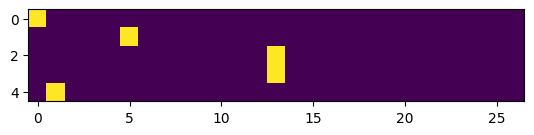

In [ ]:
plt.imshow(xenc)
#read top to down
#here the 0th bit, 5th bit, 13th and 1st bit is turned on, (hot)

In [ ]:
#notice that xenc is still an interger
xenc.dtype

torch.int64

In [ ]:
#cast to float
xenc=F.one_hot(xs,num_classes=27).float()
xenc.dtype


torch.float32

ready to pass into the nn

In [ ]:
#the random weights
W=torch.randn([27,1])
xenc @ W
#this is a 5*1 matrix
# [5 , 27] @ [27 , 1] = [5 , 1]

tensor([[-0.9653],
        [-1.3785],
        [ 1.5598],
        [ 1.5598],
        [-0.1591]])

We just fed the 5 inputs in parallel and got the output for all 5. But that was just for 1 neuron

In [ ]:
#doing for 27 neurons

W=torch.randn([27,27])
xenc @ W

# [5 , 27] @ [27 , 27] = [5 , 27 ]

tensor([[ 0.2978,  0.1226,  1.7630,  0.9926,  0.1858, -0.9300,  0.1263, -0.0266,
          0.2518,  1.1197,  0.1760,  0.2530, -0.2489, -1.0560,  0.7740,  1.7638,
          0.1859, -0.1527, -0.5821, -0.1227, -0.6241,  0.8215, -1.9640, -0.1228,
         -1.1111, -0.4763, -1.2418],
        [-1.0767, -0.5825, -0.3500,  0.8853, -0.0735, -0.9010,  0.9835, -1.3930,
         -0.5441,  0.0467,  0.5927, -0.2996,  0.2542, -0.0775,  2.0006, -0.1644,
          0.8147, -0.6113,  0.2954,  0.2879,  0.1072, -0.0599, -0.6712,  1.1465,
          1.7427, -0.4079,  0.4265],
        [ 0.4002, -0.4564, -0.8457,  1.2433,  1.3034,  2.2865,  0.9055, -0.1067,
         -0.5150,  0.7374,  0.0964, -1.0278, -1.2804, -0.0246,  2.4649, -1.9981,
          0.5624, -0.9133,  0.2926, -0.9980, -1.0583,  1.3861, -0.6882,  0.1288,
         -0.6538, -1.0515,  0.5971],
        [ 0.4002, -0.4564, -0.8457,  1.2433,  1.3034,  2.2865,  0.9055, -0.1067,
         -0.5150,  0.7374,  0.0964, -1.0278, -1.2804, -0.0246,  2.4649, -1.9981

every one of the element in the says that:

what is the firing rate for every one of those neurons on every one of those 5 examples

In [ ]:
#say the element 3,13  is giving us the firing rate of the 13th neuron looking at the 3rd input
(xenc@ W)[3,13]

tensor(-0.0246)

this was achieved by the dot product of the third input and the 13th col of the W matrix

so matrix mult can be used to efficiently evaluate the dot product between lots of input examples in a batch (. -> e, e -> m) and a lot of neurons

these neurons have weights in the columns of those Ws

In [ ]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
W[:,13]

tensor([-1.0560, -0.8671, -0.1548,  0.6366,  1.3024, -0.0775,  0.4458,  0.5899,
         0.5135,  0.0727,  0.7848,  0.2412,  0.0758, -0.0246, -0.1102, -0.0888,
        -0.2670,  0.5214, -0.5126,  0.0563, -0.6761,  0.7129,  0.4747,  0.2266,
         0.6565, -0.2304,  1.1239])

In [ ]:
(xenc[3] * W[:,13]).sum()

tensor(-0.0246)

now we are buidling a nn that has 27 inputs and 27 nerons which will give 27 outputs, no hidden layer, no bias, no act. fn

the xenc @ W has -ve values as well, we want prob, like if i give a as inp, whats the prob that i will get b - we want it like that (like the matrix of the bigram approach)

so in that matrix, we had counts, which we normalized to get prob, so we want counts or prob

now whats special about prob is that they are +ve and they sum to 1 (this cant come from a nn)

the output cant be counts- because counts of +ve and they're integers  

so lets get log counts, and to get counts, we will exponentiate these log counts

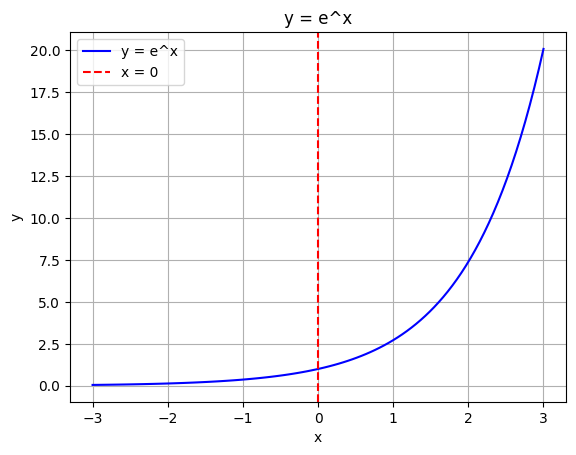

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-3, 3, 100)

# Compute e^x
y = np.exp(x)

# Plot
plt.plot(x, y, label="y = e^x", color='blue')

# Highlight x = 0
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5, label='x = 0')

# Labels and styling
plt.title("y = e^x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


Now, whats special about exp is that, it makes the -ve values less than 1, but +ve, and makes the values>1, even more than 1

In [ ]:
#so instead of -vs and +ve, we take them as log counts, and then exponentiate them
(xenc @ W).exp()

tensor([[ 1.3468,  1.1304,  5.8296,  2.6983,  1.2042,  0.3946,  1.1347,  0.9737,
          1.2863,  3.0638,  1.1925,  1.2879,  0.7797,  0.3479,  2.1683,  5.8346,
          1.2043,  0.8584,  0.5587,  0.8845,  0.5357,  2.2739,  0.1403,  0.8844,
          0.3292,  0.6211,  0.2889],
        [ 0.3407,  0.5585,  0.7047,  2.4238,  0.9291,  0.4062,  2.6737,  0.2483,
          0.5803,  1.0478,  1.8088,  0.7411,  1.2894,  0.9255,  7.3934,  0.8484,
          2.2584,  0.5427,  1.3436,  1.3337,  1.1131,  0.9419,  0.5111,  3.1471,
          5.7126,  0.6651,  1.5319],
        [ 1.4921,  0.6336,  0.4292,  3.4671,  3.6820,  9.8407,  2.4731,  0.8988,
          0.5975,  2.0906,  1.1012,  0.3578,  0.2779,  0.9757, 11.7628,  0.1356,
          1.7548,  0.4012,  1.3399,  0.3686,  0.3470,  3.9993,  0.5025,  1.1375,
          0.5200,  0.3494,  1.8169],
        [ 1.4921,  0.6336,  0.4292,  3.4671,  3.6820,  9.8407,  2.4731,  0.8988,
          0.5975,  2.0906,  1.1012,  0.3578,  0.2779,  0.9757, 11.7628,  0.1356

They're all +ve, and those that were already +ve, got more +ve

-ve numbers are <1

In [ ]:
#so we will interpret these to be log counts
logits= xenc @ W
counts= logits.exp() #same as above, equivalengt to N of before
probs= counts/counts.sum(1, keepdims=True)
probs

tensor([[0.0343, 0.0288, 0.1485, 0.0687, 0.0307, 0.0101, 0.0289, 0.0248, 0.0328,
         0.0781, 0.0304, 0.0328, 0.0199, 0.0089, 0.0552, 0.1486, 0.0307, 0.0219,
         0.0142, 0.0225, 0.0136, 0.0579, 0.0036, 0.0225, 0.0084, 0.0158, 0.0074],
        [0.0081, 0.0133, 0.0168, 0.0577, 0.0221, 0.0097, 0.0636, 0.0059, 0.0138,
         0.0249, 0.0430, 0.0176, 0.0307, 0.0220, 0.1759, 0.0202, 0.0537, 0.0129,
         0.0320, 0.0317, 0.0265, 0.0224, 0.0122, 0.0749, 0.1359, 0.0158, 0.0365],
        [0.0283, 0.0120, 0.0081, 0.0657, 0.0698, 0.1865, 0.0469, 0.0170, 0.0113,
         0.0396, 0.0209, 0.0068, 0.0053, 0.0185, 0.2230, 0.0026, 0.0333, 0.0076,
         0.0254, 0.0070, 0.0066, 0.0758, 0.0095, 0.0216, 0.0099, 0.0066, 0.0344],
        [0.0283, 0.0120, 0.0081, 0.0657, 0.0698, 0.1865, 0.0469, 0.0170, 0.0113,
         0.0396, 0.0209, 0.0068, 0.0053, 0.0185, 0.2230, 0.0026, 0.0333, 0.0076,
         0.0254, 0.0070, 0.0066, 0.0758, 0.0095, 0.0216, 0.0099, 0.0066, 0.0344],
        [0.1695, 0.0300,

In [ ]:
probs.shape

torch.Size([5, 27])

In [ ]:
#summarry--------------------->

In [ ]:
#input
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
#output
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)
W.shape

torch.Size([27, 27])

so I sampled 5 bigrams now, for eg in Emma its .Emma. so .e, em, mm, ma, a. so all of this goes to 27 input neurons, (because we have 26+1) characters as input and these input neurons are connected to 27 outputs which we get after we @ W, and we get 27 outputs, out of which the most probable is sampled

In [ ]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [ ]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

these are the probs and loss we got from the random first pass

In [ ]:
 #optimization--------->

In [ ]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
probs.shape

torch.Size([5, 27])

now, for the first (0th) eg, we're looking at prob at index 5;
for the second (1) example, we're looking at prob at index 13;
third (2) at 13;
forth (3) at 1;
fifth (0) at 0

In [ ]:
probs[0,5], probs[1,13], probs[2,13],probs[3,1],probs[4,0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

more efficient way to access these

In [ ]:
torch.arange(0,5)

tensor([0, 1, 2, 3, 4])

In [ ]:
probs[torch.arange(5),ys] # same as manually listing

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

so we can make the loss now, we want log prob, and then the mean

In [ ]:
loss = - probs[torch.arange(5),ys].log().mean()
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [ ]:
print(loss.item())

3.7693049907684326


that ends our fwd pass, we can do backward pass now

In [ ]:
#backward pass
W.grad= None #like setting to 0
loss.backward()

In [ ]:
W.shape

torch.Size([27, 27])

In [ ]:
W.grad.shape

torch.Size([27, 27])

In [ ]:
W.data += -0.1 * W.grad

In [ ]:
#formal way

In [ ]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [ ]:
# gradient descent
for k in range(50):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() #this part is same as smoothening
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -50 * W.grad

3.7686190605163574
3.3788065910339355
3.16109037399292
3.0271859169006348
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146339416504
2.7452542781829834
2.7188303470611572
2.696505546569824
2.6773719787597656
2.6608052253723145
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886809825897217
2.5822560787200928
2.5764293670654297
2.5711236000061035
2.5662729740142822
2.5618228912353516
2.5577263832092285
2.5539441108703613
2.550442695617676
2.5471925735473633
2.5441696643829346
2.5413522720336914
2.538722038269043
2.536262035369873
2.5339581966400146
2.531797409057617
2.529768228530884
2.527859926223755
2.5260636806488037
2.5243701934814453
2.522773265838623
2.52126407623291
2.519836902618408
2.5184857845306396
2.5172054767608643
2.515990734100342
2.5148372650146484
2.5137407779693604
2.512697696685791
2.511704921722412
2.5107581615448


If all Ws become 0, then everything will be uniform, so adding that part makes it smoother

In [ ]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
mogllurailezityha.
konimittain.
llayn.
ka.


Its the same as before, we even have the same-ish loss

The model we have now is just like the bigram model, but its more scalable. Right now, we have just inputs and outputs, no hidden layers, no act. That will change.

But what remains same, is that:
* we output logits
* we normalize them
* loss is calculated in the same way
* gradient based framework remains


Only the neural net itself will complexify and go all the way till transformers, the rest remains